In [1]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import model_predict

In [2]:
series, scaler = model_predict.read_data_series_filter(filter_early='2016-01', file_index=2, scale=True)
features, targets = model_predict.gen_xgboost_data(series, feature_length=12)

时间序列不连贯，缺失的月份： ['2013-11', '2014-12', '2015-04', '2017-12']
即将填充缺失的月份
月份平均：
月份
1     165.417333
2     107.969333
3      95.301778
4     123.181000
5     154.631111
6     202.507111
7     136.807500
8     117.749000
9     157.433000
10    156.723500
11    156.563429
12    136.816000
Name: 销量（箱）, dtype: float64


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 30, number of used features: 0
[LightGBM] [Info] Start training from score 0.133105
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

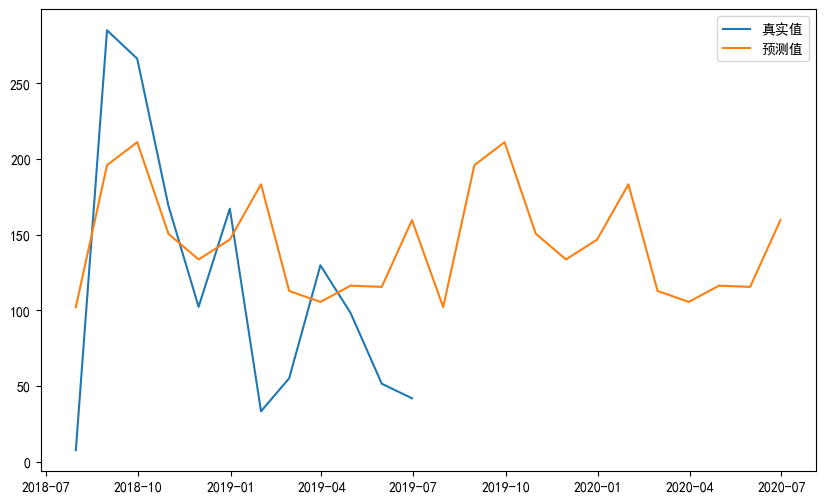

(2018-07-31    102.115600
 2018-08-31    195.994266
 2018-09-30    211.163600
 2018-10-31    150.618266
 2018-11-30    133.634266
 2018-12-31    146.807600
 2019-01-31    183.310266
 2019-02-28    112.818266
 2019-03-31    105.549266
 2019-04-30    116.295266
 2019-05-31    115.512266
 2019-06-30    159.628266
 2019-07-31    102.115600
 2019-08-31    195.994266
 2019-09-30    211.163600
 2019-10-31    150.618266
 2019-11-30    133.634266
 2019-12-31    146.807600
 2020-01-31    183.310266
 2020-02-29    112.818266
 2020-03-31    105.549266
 2020-04-30    116.295266
 2020-05-31    115.512266
 2020-06-30    159.628266
 Freq: M, dtype: float64,
 (5538.185255722005,
  61.776433289373216,
  0.2563913188973369,
  1.9792703118476298))

In [4]:
# 假设X和y已经被定义  
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

# 对于回归任务  
reg = LGBMRegressor(
    objective='mse',
    n_estimators=50,
    learning_rate=.1,
    max_depth=7,
    num_leaves=15,
    subsample=.8,
    colsample_bytree=.8,
    force_row_wise=True,
    boosting_type='gbdt',
)  
reg.fit(features, targets, eval_set=[(X_test, y_test)], eval_metric='mse')

model_predict.predict_to_future_lgbm(reg, series, scaler, last_months=12)